<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Real Estate Market Analysis

The goal of this project is to provide an analysis of real estate sales data to establish parameters and limits that can then be used in the creation of a automated system for an online real estate platform; the goal of the system will be to provide price recommendations for users as well as flag potentially fraudulent postings.

The dataset used in this project includes real estate sales information from the past several years in Saint Petersburg and the surrounding area. Included in the data are user-provided values (e.g. last_price, first_day_exposition) and data generated automatically using geographic data (e.g. parks_nearest, cityCenters_nearest).

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
real_estate_raw = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
display(real_estate_raw.head())
real_estate_raw.info()
real_estate_raw.describe().T

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

При первом взгляде на данные, отмечаются довольно большие различия между количеством данных в разных столбцах, и разные, неверные типы данных (например, столбец first_day_exposition содержит строки, надо будет перевести на datetime).

## Предобработка данных

**Пропущенные значения**

Есит пропущенные значения в следующих столбцах:

    - 'ceiling_height'
    - 'floors_total'
    - 'living_area'
    - 'is_apartment'
    - 'kitchen_area'
    - 'balcony'
    - 'locality_name'
    - 'airports_nearest'
    - 'cityCenters_nearest'
    - 'parks_around3000'
    - 'parks_nearest'
    - 'ponds_around3000'
    - 'ponds_nearest'
    - 'days_exposition'
    
В следующих столбцах уместно заполнить пропуски:

    - 'balcony'
        - пропуск вероятно означает, что нет балкона; заменим на 0
        
    - 'is_apartment'
        - апартементы - особый вид жилья; логично, что, если не написано, что объект является апартаментом, правильно заменить пропуски на False

    - 'living_area' и 'kitchen_area'
        - не уверен, стоит ли заменить пропуски в этих столбцах
        - есть отнощение между площадями кухни, жилой, и итоговой; при первом взгляде, итоговая площадь на 10 или 20 квадратных метров больше чем площади жилой и кухни (вместе)
        - надо более внимательно присматривать это отношение чтобы проверить, можно ли использовать его чтобы заменить пропуски
        
    - 'parks_around3000'/'parks_nearest' и 'ponds_around3000'/'ponds_nearest'
        - возможно, что NaN в таких столбцах значит, что нету парков/водоёмов по близости
        - если так, стоит заменить значения на 0 – таким образом можно будет видеть такие значения в гистограмме
        - чтобы проверить:
            - посмотреть пропуски: если нет значения в одном из этих столбцов, то не должно быть значения в другом (или в 'parks_nearest' и 'ponds_nearest' значение должно быть выше 3000)
            - посмотреть значения 'cityCenters_nearest' для таких строк и сравнивать с другими строками
                - если у всех других объектов, находящихся по определённому расстоянию от центра, есть парки/водоёмы по близости, тогда нельзя заменить пропуски в этих столбцах, ибо тогда неизвестна причина отсутствия информации
                
     - 'airports_nearest'
         - здесь есть возможность заменить пропуски для объектов, находящихся в центре, с маленькой погрешности, используя значения в 'cityCenters_nearest'
         - вопрос состоится в том, какова погрешность является допустимой
         - я считаю, что погрешность на меньше километра – допустимая
             - если объект находится меньше километра от центра города, можно заменить пропуск дистанцией самого центра города от аэропорта
             - для объектов, которые больше одного километра от центра, не заменю пропуски – неизвестно в какую сторону аэропорт и в какую сам объект

В следующих столбцах неуместно заполнить пропуски:

    - 'floors_total'
    - 'locality_name'
    - 'cityCenters_nearest'
    - 'days_exposition'
    - 'ceiling_height'
    
    

In [3]:
# замена пропусков в 'balcony' на 0
real_estate_raw['balcony'] = real_estate_raw['balcony'].fillna(0)
# проверка
print(f'Оставишиеся строки с значением NaN в столбце "balcony": {len(real_estate_raw[real_estate_raw["balcony"].isna()==True])}')


Оставишиеся строки с значением NaN в столбце "balcony": 0


In [4]:
# замена пропусков в 'is_apartment' на False
real_estate_raw['is_apartment'] = real_estate_raw['is_apartment'].fillna(False)
# проверка
print(f'Оставишиеся строки с значением NaN в столбце "is_apartment": {len(real_estate_raw[real_estate_raw["is_apartment"].isna()==True])}')

Оставишиеся строки с значением NaN в столбце "is_apartment": 0


In [5]:
# проверка отнощения между 'total_area', 'living_area', и 'kitchen_area'
differences_list = []

for index, row in real_estate_raw.iterrows():
    if ~np.isnan(row['living_area']) and ~np.isnan(row['kitchen_area']):
        difference = row['total_area'] - (row['living_area'] + row['kitchen_area'])
        differences_list.append(difference)
        
differences_series = pd.Series(differences_list)   
print('Описание рассчётов об отношении между "living_area", "kitchen_area", и "total_area": \n\n',  differences_series.describe())



Описание рассчётов об отношении между "living_area", "kitchen_area", и "total_area": 

 count    20982.000000
mean        15.385936
std         12.171863
min        -29.800000
25%          9.402500
50%         12.700000
75%         17.800000
max        378.300000
dtype: float64


Судя по этим расчётам, точнее по значениям 25%, 50%, и 75%, и с учётом того, что есть значение для 'total_area' в каждой строке, кажется логично заменить пропуски в 'kitchen_area' и 'living_area', используя медианой разницы между 'total_area' и сумму 'kitchen_area' и 'living_area'.

In [6]:
# проверка того, во скольких строках есть NaN либо в 'kitchen_area', либо в 'living_area' (но не во обоих)
print('Количество строк с значением NaN в столбце "kitchen_area":', 
                    len(real_estate_raw[(real_estate_raw["kitchen_area"].isna()) 
                    & ~((real_estate_raw['kitchen_area'].isna()) & (real_estate_raw['living_area'].isna()))]))
print('Количество строк с значением NaN в столбце "living_area":', 
                    len(real_estate_raw[(real_estate_raw['living_area'].isna()) 
                    & ~((real_estate_raw['kitchen_area'].isna()) & (real_estate_raw['living_area'].isna()))]))

Количество строк с значением NaN в столбце "kitchen_area": 814
Количество строк с значением NaN в столбце "living_area": 439


In [9]:
# замена пропусков в 'kitchen_area' и 'living_area'

def kitchen_area_sub(row):
    if pd.isna(row['kitchen_area']) == True:
        if pd.isna(row['living_area']) == False:
            new_area = row['total_area'] - (row['living_area'] + 12.7)
            return new_area
    else:
        return row['kitchen_area']
    
def living_area_sub(row):
    if pd.isna(row['living_area']) == True:
        if pd.isna(row['kitchen_area']) == False:
            new_area = row['total_area'] - (row['kitchen_area'] + 12.7)
            return new_area
    else:
        return row['living_area']
    
    
real_estate_raw['kitchen_area'] = real_estate_raw.apply(kitchen_area_sub, axis=1)
real_estate_raw['living_area'] = real_estate_raw.apply(living_area_sub, axis=1)


In [10]:
# проверка отсутствия строк, где только один из 'kitchen_area' и 'living_area' – NaN

print('Количество строк с значением NaN в столбце "kitchen_area":', 
                    len(real_estate_raw[(real_estate_raw["kitchen_area"].isna()) 
                    & ~((real_estate_raw['kitchen_area'].isna()) & (real_estate_raw['living_area'].isna()))]))
print('Количество строк с значением NaN в столбце "living_area":', 
                    len(real_estate_raw[(real_estate_raw['living_area'].isna()) 
                    & ~((real_estate_raw['kitchen_area'].isna()) & (real_estate_raw['living_area'].isna()))]))
print('Количество строк, где сумма "kitchen_area" и "living_area" превышает "total_area":', 
                    len(real_estate_raw[(real_estate_raw['total_area'] < 
                                         (real_estate_raw['kitchen_area'] + real_estate_raw['living_area']))]))

Количество строк с значением NaN в столбце "kitchen_area": 0
Количество строк с значением NaN в столбце "living_area": 0
Количество строк, где сумма "kitchen_area" и "living_area" превышает "total_area": 64


In [11]:
(real_estate_raw[(real_estate_raw['total_area'] < (real_estate_raw['kitchen_area'] + real_estate_raw['living_area']))]
            [['total_area', 'living_area', 'kitchen_area']])
    

,total_area,living_area,kitchen_area
184,30.20,26.10,6.20
545,23.80,20.00,5.00
551,31.59,30.55,9.28
601,53.70,48.30,7.00
696,34.69,23.43,23.43
...,...,...,...
21824,44.00,38.00,8.60
21868,34.30,30.60,8.00
21915,91.40,62.00,32.40
21956,46.00,44.00,8.00


In [12]:
def total_area_check_kitchen(row):
    if ((row['total_area'] < (row['kitchen_area'] + row['living_area']))
        & (row['total_area']/2 <= row['kitchen_area'])):
            return row['total_area'] - row['living_area']
    return row['kitchen_area']

def total_area_check_living(row):
    if ((row['total_area'] < (row['kitchen_area'] + row['living_area']))
        & (row['total_area']/2 <= row['living_area'])):
            return row['total_area'] - row['kitchen_area']
    return row['living_area']

real_estate_raw['kitchen_area'] = real_estate_raw.apply(total_area_check_kitchen, axis=1)
real_estate_raw['living_area'] = real_estate_raw.apply(total_area_check_living, axis=1)

(real_estate_raw[(real_estate_raw['total_area'] < (real_estate_raw['kitchen_area'] + real_estate_raw['living_area']))]
            [['total_area', 'living_area', 'kitchen_area']])

,total_area,living_area,kitchen_area
551,31.59,22.31,9.28


Питон говорит, что ещё осталось одна строка, в которой сумма кухни и жилой площади превышает общую площадь, но это не точно. Хотя правда маловероятно, чтобы сумма была точно равна общей площади (ибо должно быть какая-то неиспользуемая площадь), теоритически это возможно. Поскольку не знаю хорошего способ уменьшить или living_area или kitchen_area, оставлю эту маловероятную строку так, как она есть.

In [13]:
display(real_estate_raw.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


посмотреть пропуски: если нет значения в одном из этих столбцов, то не должно быть значения в другом (или в 'parks_nearest' и 'ponds_nearest' значение должно быть выше 3000)

        - посмотреть значения 'cityCenters_nearest' для таких строк и сравнивать с другими строками
            - если у всех других объектов, находящихся по определённому расстоянию от центра, есть парки/водоёмы по близости, тогда нельзя заменить пропуски в этих столбцах, ибо тогда неизвестна причина отсутствия информации

In [14]:
# проверка 'parks_around3000' и 'parks_nearest':  если нет значения в одном из этих столбцов, то не должно быть значения в другом
display(real_estate_raw[(real_estate_raw['parks_around3000'].isna() | real_estate_raw['parks_around3000'] == 0) 
                          & ~(real_estate_raw['parks_nearest'].isna() | real_estate_raw['parks_nearest'] == 0)]
        [['parks_around3000', 'parks_nearest', 'cityCenters_nearest']].head(10))

# проверка 'ponds_around3000' и 'ponds_nearest':  если нет значения в одном из этих столбцов, то не должно быть значения в другом
display(real_estate_raw[(real_estate_raw['ponds_around3000'].isna() | real_estate_raw['ponds_around3000'] == 0)
                          & ~(real_estate_raw['ponds_nearest'].isna() | real_estate_raw['ponds_nearest'] == 0)]
        [['ponds_around3000', 'ponds_nearest', 'cityCenters_nearest']].head(10))



,parks_around3000,parks_nearest,cityCenters_nearest
1,0.0,NaN,18603.0
6,0.0,NaN,19143.0
7,0.0,NaN,11634.0
9,0.0,NaN,15008.0
11,0.0,NaN,51677.0
14,0.0,NaN,30759.0
17,0.0,NaN,14616.0
19,0.0,NaN,12843.0
20,0.0,NaN,19311.0
25,0.0,NaN,14640.0


,ponds_around3000,ponds_nearest,cityCenters_nearest
1,0.0,NaN,18603.0
6,0.0,NaN,19143.0
7,0.0,NaN,11634.0
9,0.0,NaN,15008.0
11,0.0,NaN,51677.0
16,0.0,NaN,10698.0
18,0.0,NaN,10842.0
19,0.0,NaN,12843.0
20,0.0,NaN,19311.0
21,0.0,NaN,9722.0


In [15]:
# в строках, где есть значение 0 в 'parks_around3000' и 'ponds_around3000',
# логично заменить пропуски 'parks_nearest' и 'ponds_nearest' на 0

for value1, value2 in zip(real_estate_raw['parks_around3000'], real_estate_raw['parks_nearest']):
    if value1 == 0 and pd.isna(value2) == True:
        real_estate_raw['parks_nearest'] = 0

for value1, value2 in zip(real_estate_raw['ponds_around3000'], real_estate_raw['ponds_nearest']):
    if value1 == 0 and pd.isna(value2) == True:
        real_estate_raw['ponds_nearest'] = 0

In [16]:
# проверка наличии географической информации в строках, где есть значения NaN в 'parks_around3000' и 'ponds_around3000'
display(real_estate_raw.query('(parks_around3000 != parks_around3000) or (ponds_around3000 != ponds_around3000)')
                            [['parks_around3000', 'parks_nearest', 'ponds_around3000', 
                              'ponds_nearest', 'cityCenters_nearest']])



,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,cityCenters_nearest
5,NaN,0,NaN,0,NaN
8,NaN,0,NaN,0,NaN
12,NaN,0,NaN,0,NaN
22,NaN,0,NaN,0,NaN
30,NaN,0,NaN,0,NaN
...,...,...,...,...,...
23683,NaN,0,NaN,0,NaN
23692,NaN,0,NaN,0,NaN
23695,NaN,0,NaN,0,NaN
23696,NaN,0,NaN,0,NaN


In [17]:
# кажется, что географические для таких объектов отсутсвуют. Перепроверим, добавив 'airports_nearest' и 'locality_name'

display(real_estate_raw.query('(parks_around3000 != parks_around3000) or (ponds_around3000 != ponds_around3000)')
                            [['parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest',
                              'cityCenters_nearest', 'airports_nearest', 'locality_name']])



,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,cityCenters_nearest,airports_nearest,locality_name
5,NaN,0,NaN,0,NaN,NaN,городской посёлок Янино-1
8,NaN,0,NaN,0,NaN,NaN,посёлок Мурино
12,NaN,0,NaN,0,NaN,NaN,Сертолово
22,NaN,0,NaN,0,NaN,NaN,деревня Кудрово
30,NaN,0,NaN,0,NaN,NaN,Коммунар
...,...,...,...,...,...,...,...
23683,NaN,0,NaN,0,NaN,NaN,посёлок Дзержинского
23692,NaN,0,NaN,0,NaN,NaN,Тихвин
23695,NaN,0,NaN,0,NaN,NaN,Тосно
23696,NaN,0,NaN,0,NaN,NaN,село Рождествено


In [18]:
# обработка значений в 'locality_name'
real_estate_raw['locality_name'] = real_estate_raw['locality_name'].apply(str)
remove_words = ["поселок", "посёлок", "городского", "городской", "типа", "село", "деревня", "товарищество", "коттеджный"]
pat = '|'.join(remove_words)
real_estate_raw['locality_name'] = (
    real_estate_raw['locality_name'].str.lower()
    .replace(pat,'', regex=True)
    .apply(lambda x: x.strip())
)
real_estate_raw['locality_name'].sort_values().unique()


array(['nan', 'агалатово', 'александровская', 'алексеевка', 'аннино',
       'аро', 'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'виллози',
       'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жил', 'жилгородок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара', 'ильичёв

In [19]:
# проверка наличия географических данных для тех мест, которым не содержат данные о парках или водоёмах
geo_check_pivot = real_estate_raw.pivot_table(index=real_estate_raw['locality_name'], 
                            values=['parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 
                            'cityCenters_nearest', 'airports_nearest', 'locality_name'], aggfunc=['mean', 'count'])

display(geo_check_pivot[(geo_check_pivot['mean']['airports_nearest'].isna() == True) | 
                        (geo_check_pivot['mean']['cityCenters_nearest'].isna() == True)]
                        .sort_values([('count', 'locality_name')], ascending=False)['count']['locality_name']
                        .to_frame().head())
display(real_estate_raw[(real_estate_raw['locality_name'] == ('кудрово' or 'всевололжск' or 'гатчина')) & 
                        (real_estate_raw[('cityCenters_nearest' or 'airports_nearest' or 'parks_around3000' or 
                        'ponds_around3000')].isna() == False)])
display(real_estate_raw.query('locality_name == "кудрово"').head())



,locality_name
locality_name,
кудрово,472
всеволожск,398
гатчина,307
выборг,237
новое девяткино,144


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.0,15,False,...,11.0,2.0,кудрово,NaN,NaN,NaN,0,NaN,0,60.0
333,10,5800000.0,57.0,2017-08-30T00:00:00,2,2.76,18.0,29.0,3,False,...,13.0,0.0,кудрово,NaN,NaN,NaN,0,NaN,0,122.0
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,False,...,-4.7,0.0,кудрово,NaN,NaN,NaN,0,NaN,0,45.0
369,20,4440000.0,41.4,2018-11-18T00:00:00,1,2.70,18.0,16.7,10,False,...,10.9,0.0,кудрово,NaN,NaN,NaN,0,NaN,0,NaN
515,7,5500000.0,51.4,2018-09-06T00:00:00,2,2.60,14.0,29.1,11,False,...,9.3,1.0,кудрово,NaN,NaN,NaN,0,NaN,0,60.0


Полученная информация - интересная. С одной стороны, гипотеза, что географические данные о некоторых местностях отсутствуют, подтвердилась. С другой стороны, если смотрим на Кудрово как пример, становится ясно, что тот факт, что в таблице данные отсутствуют, не значит, что нету по близости парков, водоёмов, аэропортов или центра большого города.

Исходя от этого, мы знаем, что нельзя заменить NaN на 0, поскольку NaN не означает отсутствие какого-либо места, а просто отсуствие данных в таблице об этом. Поэтому, неизвестно, какое значение было бы подходящим для замены пропусков.

In [20]:
# замена пропусков в 'airports_nearest': проверка того, что речь идёт только о петербурге
airport_check = (real_estate_raw[real_estate_raw['cityCenters_nearest'] < 1000]
                [['cityCenters_nearest', 'airports_nearest', 'locality_name']])
display(airport_check.query('locality_name != "санкт-петербург"'))
display(airport_check[airport_check['airports_nearest'].isna() == True])


,cityCenters_nearest,airports_nearest,locality_name


,cityCenters_nearest,airports_nearest,locality_name


Поскольку нет строк и с NaN в 'airports_nearest', и для которых уместно заменить пропуски (где объект меньше находится меньше километра от центра), этот шаг отменяется. Для других городов или расстояний от центра нелогично заменить такие пропуски, ибо вероятная погрешность слишком сильно увеличивается.

In [21]:
print('Количество оставщихся пропусков в столбце: \n')
for column in real_estate_raw.columns:
    print(f'{column} : {len(real_estate_raw[real_estate_raw[column].isna() == True])}')

Количество оставщихся пропусков в столбце: 

total_images : 0
last_price : 0
total_area : 0
first_day_exposition : 0
rooms : 0
ceiling_height : 9195
floors_total : 86
living_area : 1464
floor : 0
is_apartment : 0
studio : 0
open_plan : 0
kitchen_area : 1464
balcony : 0
locality_name : 0
airports_nearest : 5542
cityCenters_nearest : 5519
parks_around3000 : 5518
parks_nearest : 0
ponds_around3000 : 5518
ponds_nearest : 0
days_exposition : 3181


**Вывод о замене пропусков**

Этот этап не удался с такой успешностью, с которой бы хотелось. Здесь речь идёт особенно о географических данных. Не получилось определить хорошую замену для многих таких данных. Однако, считаю, что принял правильное решение, не заменив эти пропуски возмодно неточное значение.

Для других пропусков, удалось найти хорошую замену. Гипотеза, что можно было бы использовать отношение между 'kitchen_area', 'living_area', и 'total_area', подтвердилась, и таким образом пропуски в 'kitchen_area' и 'living_area' были заполнены.

Также были заполнены пропуски в столбцах 'is_aparment' и 'balcony'.

In [22]:
# создание копии, чтобы можно было проверять/сравнивать с данными в исходной таблице после добавления или изменений данных
real_estate_clean = real_estate_raw.copy()

In [23]:
# проверка копии
display(real_estate_clean.head())
print(real_estate_clean.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,0,2.0,0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,шушары,12817.0,18603.0,0.0,0,0.0,0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,0,2.0,0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,0,3.0,0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,0,1.0,0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           22235 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          22235 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [24]:
# день недели, месяц и год публикации объявления
real_estate_clean['first_day_exposition'] = pd.to_datetime(real_estate_clean['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# добавление столбцов с информацией о дате размещения объявления
def day_dt(row):
    day = row['first_day_exposition'].weekday()
    return day
def month_dt(row):
    month = row['first_day_exposition'].month
    return month
def year_dt(row):
    year = row['first_day_exposition'].year
    return year

real_estate_clean['day_of_week'] = real_estate_clean.apply(day_dt, axis=1)
real_estate_clean['month'] = real_estate_clean.apply(month_dt, axis=1)
real_estate_clean['year'] = real_estate_clean.apply(year_dt, axis=1)
display(real_estate_clean.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,0,2.0,0,NaN,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0.0,0,0.0,0,81.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1.0,0,2.0,0,558.0,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,28098.0,6800.0,2.0,0,3.0,0,424.0,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,0,1.0,0,121.0,1,6,2018


**Изменение тип данных в 'first_day_exposition'**

В этой таблице, я только изменил тип данных в столбце 'first_day_exposition'. Нужно было делать это для того, чтобы создать отдельные столбцы с месяцом, годом, и днём недели публикации объявлений. Эти новые столбцы помогли потом в анализе влияние времени публикации на цену.

Не требовалось изменение тип данных в других столбцах, поскольку это бы не помогло далнейшего расследования. Единственное, что можно было бы делать, это поменять тип float в 'cityCenters_nearest' на int, поскольку ниже создан столбец 'km_from_center' с целочисленными значениями, но во первых именно тип данных (в этом случае) не влияет на задачу, за которую нужен этот столбец, а во вторых, при изменении тип float на int, не происходит математическое округление, а округление к меньшему (при создании столбца, использую .round, метод для математического округления).

## Расчёты и добавление результатов в таблицу

**Добавление в таблицу**

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [26]:
# добавление столбца с ценой квадратного метра

def sq_m_price(row):
    price = row['last_price']/row['total_area']
    return price

real_estate_clean['sq_m_price'] = real_estate_clean.apply(sq_m_price, axis=1)

display(real_estate_clean.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week,month,year,sq_m_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,0,2.0,0,NaN,3,3,2019,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,0,0.0,0,81.0,1,12,2018,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,0,2.0,0,558.0,3,8,2015,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,0,3.0,0,424.0,4,7,2015,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,0,1.0,0,121.0,1,6,2018,100000.000000


In [27]:
# создание столбец с категоризированными данными о этаже квартиры; варианты — первый, последний, другой;

floor_dict = {'первый':0, 'другой':1, 'последний':2}
floor_series = pd.Series(floor_dict)
display(floor_series.to_frame())

def categorize_floors(row):
    floor = row['floor']
    if floor == 1:
        return 0
    elif floor == row['floors_total']:
        return 2
    elif pd.isna(floor) == True:
        return floor
    return 1
    
real_estate_clean['floor_cat'] = real_estate_clean.apply(categorize_floors, axis=1)
        

,0
первый,0
другой,1
последний,2


In [28]:
# соотношение жилой и общей площади, а также отношение площади кухни к общей
def living_area_ratio(row):
    ratio = row['living_area']/row['total_area']
    return ratio
def kitchen_area_ratio(row):
    ratio = row['kitchen_area']/row['total_area']
    return ratio
real_estate_clean['living_to_total'] = real_estate_clean.apply(living_area_ratio, axis=1)
real_estate_clean['kitchen_to_total'] = real_estate_clean.apply(kitchen_area_ratio, axis=1)

In [29]:
# проверка новых столбцов
display(real_estate_clean.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,day_of_week,month,year,sq_m_price,floor_cat,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,0,NaN,3,3,2019,120370.370370,1,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,0,81.0,1,12,2018,82920.792079,0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,0,558.0,3,8,2015,92785.714286,1,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,0,424.0,4,7,2015,408176.100629,1,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,0,121.0,1,6,2018,100000.000000,1,0.320000,0.410000


**Вывод о создании новых столбцов**

Успешно созданы были следующие столбцы:

    - 'sq_m_price' : цена по квадратному метру
    - 'day_of_week' : день недели размещения объявдения
    - 'month' : месяц размещения объявдения
    - 'year' : год размещения объявдения
    - 'floor_cat' : категория этажа: первый, последний, или другой
    - 'living_to_total' : соотношение жилой и общей площади
    - 'kitchen_to_total' : отношение площади кухни к общей площади
    
Единственное замечание, которое можно делать в этот момент, это то, что есть больше объектов с значением 1 в 'floor_cat', что означает, что объект ни на первом, ни на последном этаже. Чтобы привести другие выводы, нужно больше анализировать данные.

## Исследовательский анализ данных

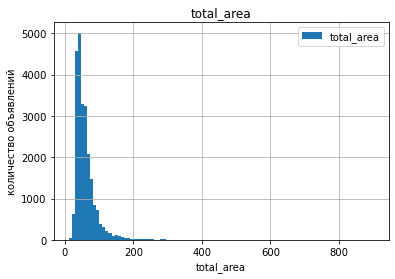

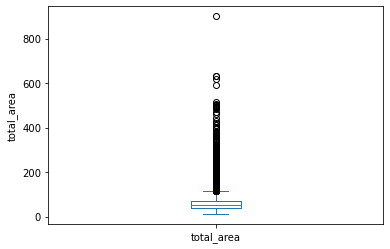

,total_area
count,23699.000000
mean,60.348651
std,35.654083
min,12.000000
25%,40.000000
50%,52.000000
75%,69.900000
max,900.000000


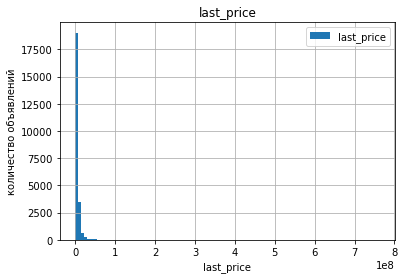

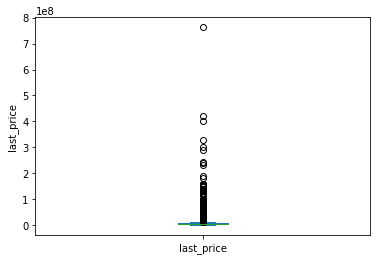

,last_price
count,2.369900e+04
mean,6.541549e+06
std,1.088701e+07
min,1.219000e+04
25%,3.400000e+06
50%,4.650000e+06
75%,6.800000e+06
max,7.630000e+08


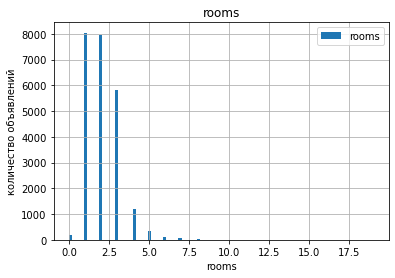

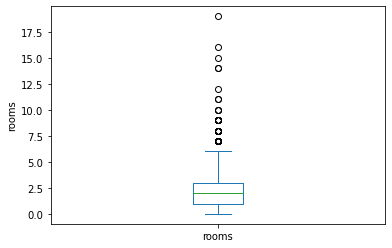

,rooms
count,23699.000000
mean,2.070636
std,1.078405
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


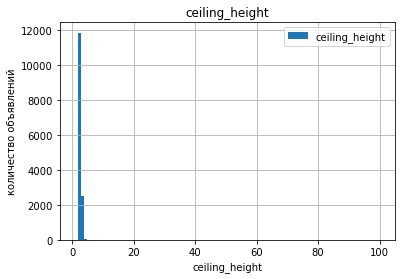

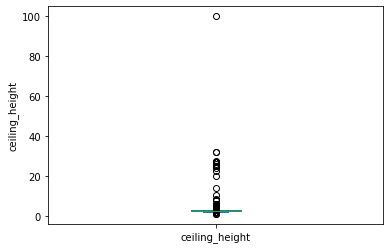

,ceiling_height
count,14504.000000
mean,2.771499
std,1.261056
min,1.000000
25%,2.520000
50%,2.650000
75%,2.800000
max,100.000000


In [30]:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in column_list:
    real_estate_clean.hist(column=column, bins=100, legend=True)
    plt.ylabel('количество объявлений')
    plt.xlabel(column)
    plt.show()
    real_estate_clean[column].plot(kind='box', legend=True)
    plt.ylabel(column)
    plt.show()
    display(pd.Series(real_estate_clean[column].describe()).to_frame())

In [31]:
for column in column_list:
    display(pd.Series(real_estate_clean[column].sort_values().head(10)).to_frame())
    
display(real_estate_clean.query('rooms == 0')[['total_area', 'studio', 'open_plan']])

,total_area
19904,12.0
17961,13.0
19546,13.0
19807,13.0
19558,13.2
19642,14.0
16949,15.0
12040,15.0
8886,15.5
9412,16.0


,last_price
8793,12190.0
17456,430000.0
14911,430000.0
16274,440000.0
17676,450000.0
16219,450000.0
9581,450000.0
5698,450000.0
21912,470000.0
18867,470000.0


,rooms
9412,0
8886,0
18132,0
20002,0
21425,0
12229,0
3019,0
2532,0
22047,0
2727,0


,ceiling_height
22590,1.00
5712,1.20
16934,1.75
2572,2.00
19329,2.00
11352,2.00
5850,2.00
19098,2.00
16884,2.00
22960,2.00


,total_area,studio,open_plan
144,27.00,True,False
349,25.00,False,True
440,27.11,True,False
508,34.40,False,True
608,25.00,True,False
...,...,...,...
23210,26.00,True,False
23442,27.70,False,True
23554,26.00,True,False
23592,29.00,False,True


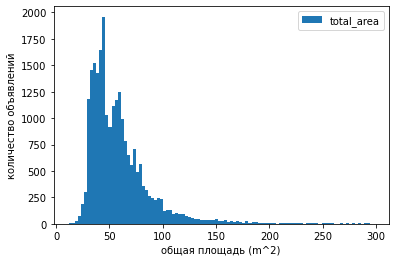

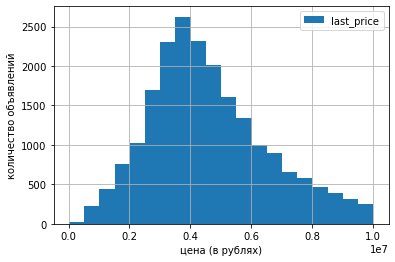

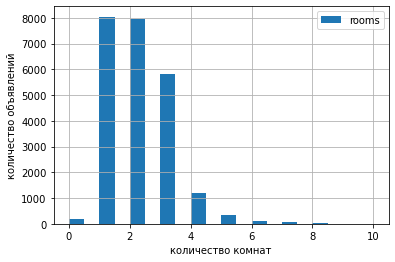

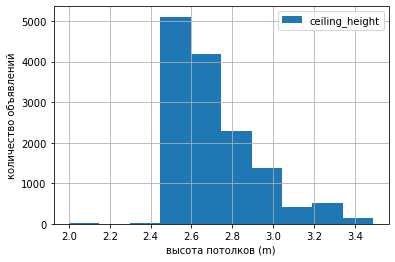

In [32]:
# построим новые графики с меньшим диапазоном значений, чтобы данные были лучше видны
real_estate_clean.query('total_area < 300')['total_area'].plot(kind='hist', bins=100, legend=True)
plt.ylabel('количество объявлений')
plt.xlabel('общая площадь (m^2)')
plt.show()
real_estate_clean.query('last_price < 10000000')['last_price'].hist(bins=20, legend=True)
plt.ylabel('количество объявлений')
plt.xlabel('цена (в рублях)')
plt.show()
real_estate_clean.query('(rooms <= 10)')['rooms'].hist(bins=20, legend=True)
plt.ylabel('количество объявлений')
plt.xlabel('количество комнат')
plt.show()
real_estate_clean.query('(ceiling_height < 3.5) and (ceiling_height >= 2)')['ceiling_height'].hist(bins=10, legend=True)
plt.ylabel('количество объявлений')
plt.xlabel('высота потолков (m)')
plt.show()


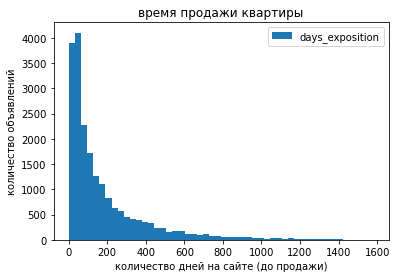

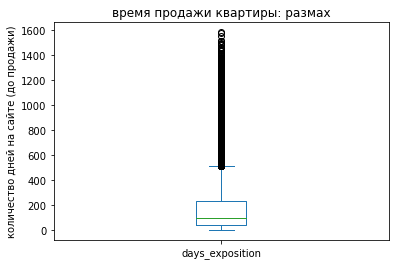

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


,total_area
days_exposition,
45.0,880
60.0,538
7.0,234
30.0,208
90.0,204
...,...
992.0,1
993.0,1
994.0,1


In [33]:
# Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. 
# Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

real_estate_clean['days_exposition'].plot(kind='hist', bins=50, title='время продажи квартиры', legend=True)
plt.ylabel('количество объявлений')
plt.xlabel('количество дней на сайте (до продажи)')
plt.show()
real_estate_clean['days_exposition'].plot(kind='box', title='время продажи квартиры: размах')
plt.ylabel('количество дней на сайте (до продажи)')
plt.show()

print(real_estate_clean['days_exposition'].describe())

display(real_estate_clean.pivot_table(index='days_exposition', aggfunc='count')['total_area']\
        .sort_values(ascending=False).to_frame())


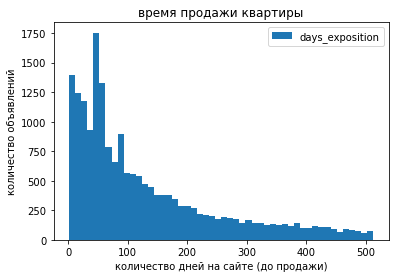

In [34]:
# строим графики снова, но без таких значений, которые больше 513
real_estate_clean.query('days_exposition <= 513')['days_exposition']\
    .plot(kind='hist', bins=50, title='время продажи квартиры', legend=True)
plt.ylabel('количество объявлений')
plt.xlabel('количество дней на сайте (до продажи)')
plt.show()


**Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

Первый гистограмм (все значения):
    
    Этот гистограмм показывает, что подавляющее большинство объектов продалось в течение 200 дней. График представляет плавную тенденцию, которая похожа на распределение Пуассона. Этот факт говорит о том, что этим данным можно доверять. Зато, ещё присутствуют выбивающиеся значения.

Диаграмма размаха и описание:
    
    Диаграмма размаха и описание помогают определять наиболее существенные строки для анализа. Так называемые "усы" диаграммы показывают границы полезных для анализа значений. Здесь, они показывают, что нормальные значения находятся между 0 и 512.5.
    Благодаря описанию, знаем, что диапазон значений довольно широкий: стандартное отклонение – 219.73, что говорит о том, что время продажи квартиры может сильно отличаться от других значений а при этом считаться нормальным. Также видим, что самое короткое время продажи только один день, а самый длинное больше четырёх лет.

Второй гистограмм (значения меньше или равно 513): 

    Этот гистограмм показывает ту же информацию как и первый, но уже без разбросов, а поэтому точнее. Отмечается, что здесь присутствует некое понижение в районе 50 дней. Чтобы определить, почему именно так, пришлось бы больше данных анализировать. Один вариант, например, это то, что возможно люди сначала ставят более высокую цену, потом, если не получается продавать, уже снижают цену, а в результате продают квартиру успешно. Но, для такого вывода, нужно больше данных и анализа. Несмотря на это понижение, график всё-ещё ответсвует распределение Пуассона.
    
Общий ответ на вопрос:

    Можно считать, что квартиры необычно долго продавались, если время продажи больше 513. Значения с более длинным временем продажи являются отклонением от нормы.
    
    Насчёт быстрой продажи, труднее сказать. С одной стороны, припоминается понижение в графике. Действительно можно считать, что квартиры, которые продались за меньше 50 дней действительно очень быстро продались.
    
    Однако, я считаю, что тут не определить такую точную границу. Дело в том, что довольно много значений 1. Нужно больше данных, но сразу две идие приходит на ум. Одна это то, что некоторые квартиры, по сравнению с их конкурентами, очень желанные. Может быть они в отличном месте, может в отличном состоянии, может всякое такое, а люди, которые уже возможно долго ищут квартиру, сразу пользуются возможностью приобрести хорошую. Данные о времени пойска квартиры было бы полезно тут, чтобы больше анализировать. Вторая идея это то, что некоторые люди продают квартиры по нужде, в смысле, что они обязаны быстро продать квартиру по экономическим причинам. В таких случаях, они могут ставить цену по ниже чтобы быстрее продать квартиру. Такая униженная цена может быть причиной быстрой продажи. В обоих этих случаев, есть обстоятелства, которые могут отличаются от обстоятеств нормальной продажи. Поэтому трудно сказать точно, что является быстрой продажой квартиры.


count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


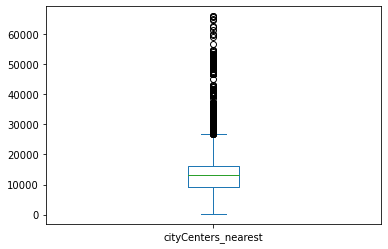

In [35]:
print(real_estate_clean['cityCenters_nearest'].describe())
real_estate_clean['cityCenters_nearest'].plot(kind='box')
plt.show()

In [36]:
# Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
filter_conditions = (((pd.isna(real_estate_clean['last_price']) == True) |(real_estate_clean['last_price'] < 11900000)) &
                     ((pd.isna(real_estate_clean['total_area']) == True) | (real_estate_clean['total_area'] < 114.75)) &
                     ((pd.isna(real_estate_clean['rooms']) == True) | (real_estate_clean['rooms'] <= 6)) &
                     ((pd.isna(real_estate_clean['cityCenters_nearest']) == True) | (real_estate_clean['cityCenters_nearest'] < 26875.5)) &
                     ((pd.isna(real_estate_clean['ceiling_height']) == True) | ((real_estate_clean['ceiling_height'] < 3.3)\
                                                                               & (real_estate_clean['ceiling_height'] > 2.1)))
                    )

print(len(real_estate_clean[filter_conditions]))
display(real_estate_clean[filter_conditions].head())

19439


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,day_of_week,month,year,sq_m_price,floor_cat,living_to_total,kitchen_to_total
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,0,81.0,1,12,2018,82920.792079,0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,0,558.0,3,8,2015,92785.714286,1,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,0,121.0,1,6,2018,100000.000000,1,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,0,55.0,0,9,2018,95065.789474,1,0.473684,0.299342
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,0.0,0,155.0,3,11,2017,99195.710456,1,0.284182,0.386059


**Устранение ненормативных значений**

Пользуясь описаниями и графиками столбцов, я устранил ненормативные значения. Я посчитал границу нормального и ненормального, опираясь на "усах", точнее таким образом: Q3+((Q3-Q1)\*1.5) для определения верхней границы, и Q3-((Q3-Q1)\*1.5) для опрделения нижней.

Потом, я использовал эти значения чтобы создать условия для фильтрации, которые я передал датафрейму как булев массив. Я решил допускать при том значения NaN, чтобы строки, в которых только не хватает значения в одном из интересных нам столбцов, не удалились.

Из 23699 строк в таблице, остались 19804. Всего это 3895, что получается 16.4 процентов изначального количества строк в таблице. 16.4 не то, что мало, но считаю, что потеря такого количества данных не настолько важна с учётом того, что сохранившиеся данные более существенные и показательные.


Насчёт замечаний о том, какие именно данные потерялись, можно сказать, что выбивающиеся значения почти всегда были значения более высокие. К тому же, огромная доля этих 3895 строк устранились из-за значений в столбце 'last_price'. Используя 'last_price' как примером: "усы" определили верхную границу 1190000, а выше этой границы были 2034 значений. Это хороший пример того, как выбросы были почти всегда выше нормы. Выбросы которые были ниже нормы были только в столбце 'ceiling_height', а наверно были ошибочно введены (например нелогично, что есть квартиры с высотой потолков меньше двух метра). Также, этот факт про 'last_price' наверно говорит о присутствии в данных информации о люкс-квартиры, которые наверняка роскошнее, больше, и конечно дороже других квартир настолько, что они уже не могут считаться принадлежащими норме.



array([[<AxesSubplot:xlabel='sq_m_price', ylabel='sq_m_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='sq_m_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='sq_m_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='sq_m_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='sq_m_price'>],
       [<AxesSubplot:xlabel='sq_m_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>],
       [<AxesSubplot:xlabel='sq_m_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='rooms'>],
       [<AxesSubplot:xlabel='sq_m_pric

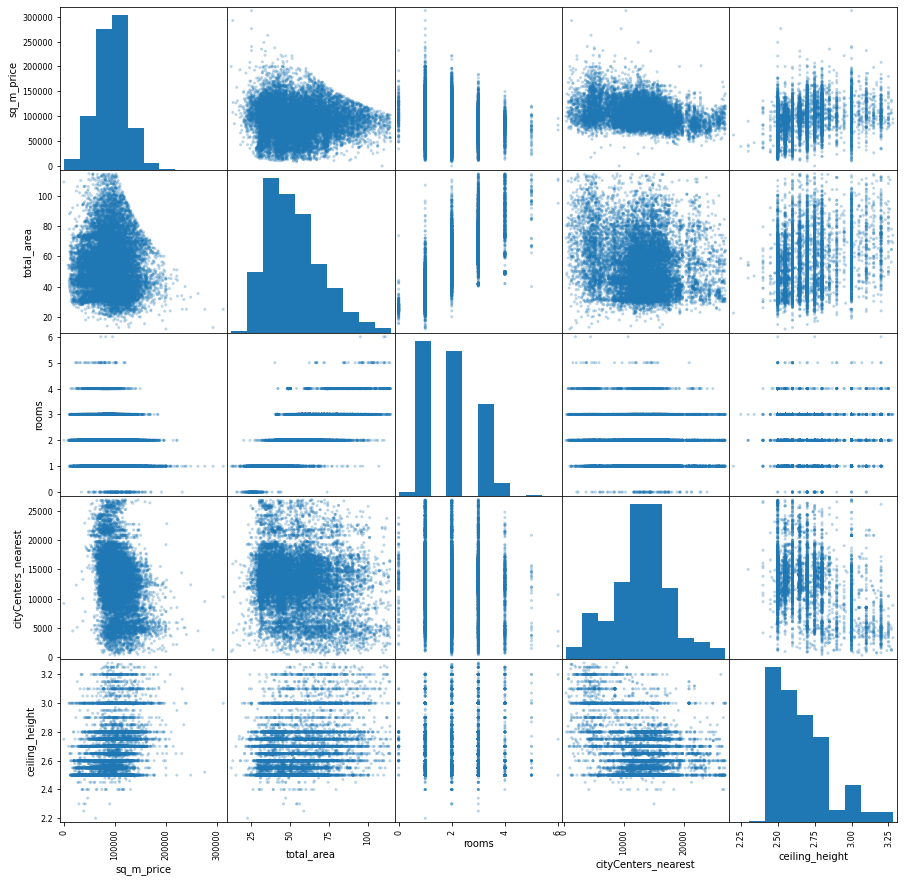

In [37]:
# Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, 
# удалённости от центра. 
pd.plotting.scatter_matrix(real_estate_clean[filter_conditions][['sq_m_price', 'total_area', 'rooms', 'cityCenters_nearest', 'ceiling_height']], figsize=(15,15), alpha=0.3)



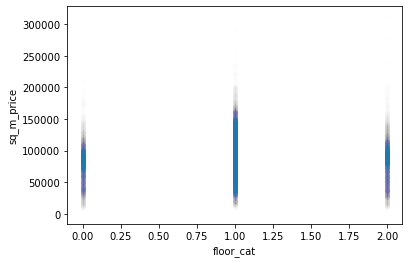

,count,median
,sq_m_price,sq_m_price
floor_cat,,
0,2421,80717.488789
1,14452,97058.823529
2,2566,85391.260163


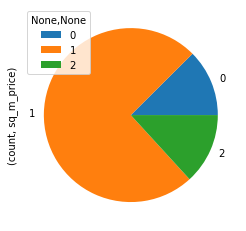

In [38]:
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

real_estate_clean[filter_conditions].plot(x='floor_cat', y='sq_m_price', kind='scatter', alpha=0.005)
plt.show()
display(real_estate_clean[filter_conditions].pivot_table(index='floor_cat', values='sq_m_price', aggfunc=['count', 'median']))
real_estate_clean[filter_conditions].pivot_table(index='floor_cat', values='sq_m_price', aggfunc=['count', 'median'])\
    .plot(y=('count', 'sq_m_price'), kind='pie')
plt.show()




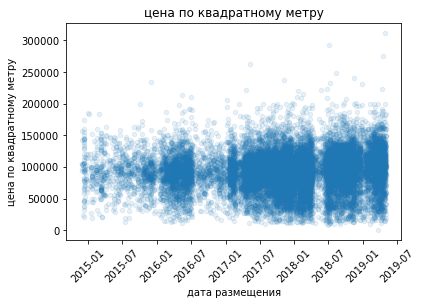

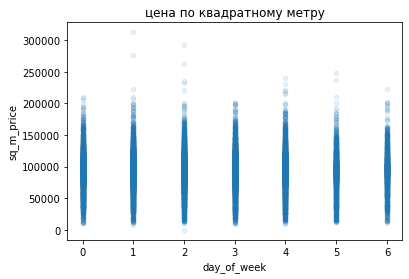

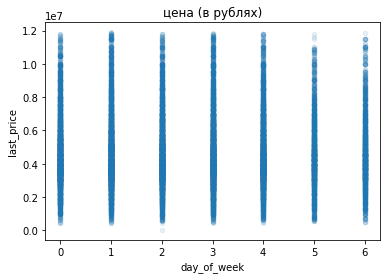

,count,median
,sq_m_price,sq_m_price
day_of_week,,
0,2955,93421.052632
1,3463,94339.622642
2,3237,94378.698225
3,3477,93767.236624
4,3296,93750.000000
5,1600,92509.842520
6,1411,93891.402715


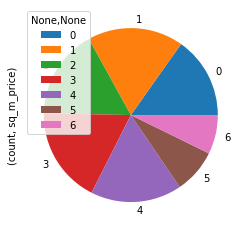

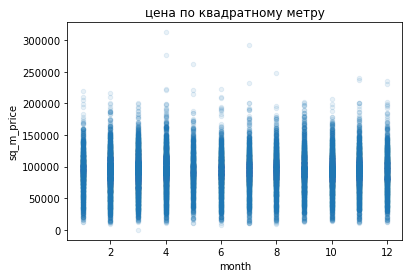

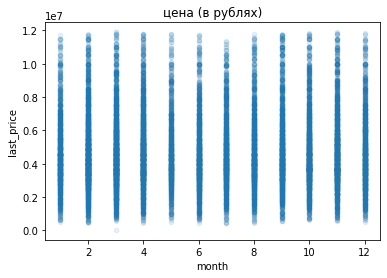

,count,median
,sq_m_price,sq_m_price
month,,
1,1196,94146.312300
2,2163,94249.578415
3,2128,94323.226884
4,1972,95698.427382
5,1037,92045.454545
6,1427,91891.891892
7,1385,93256.814921
8,1463,94786.729858


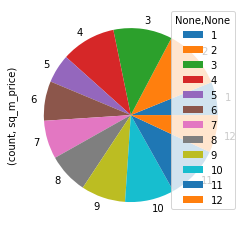

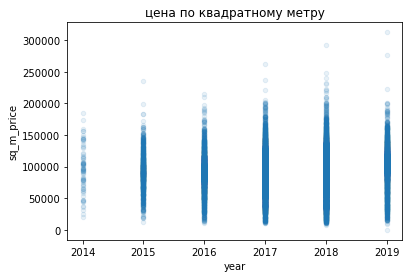

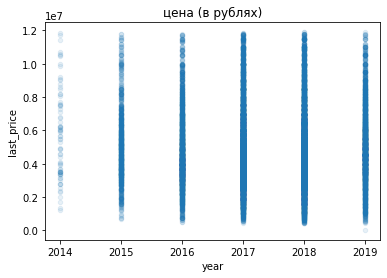

,count,median
,sq_m_price,sq_m_price
year,,
2014,77,97000.000000
2015,887,91111.111111
2016,2238,90477.389913
2017,6711,91666.666667
2018,7140,94925.981549
2019,2386,102387.284701


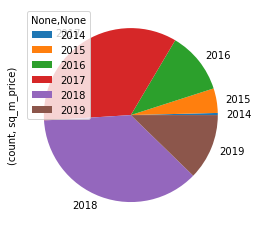

In [39]:
#Также изучите зависимость от даты размещения: дня недели, месяца и года.

time_list = ['day_of_week', 'month', 'year']
real_estate_clean[filter_conditions].plot(x='first_day_exposition', y='sq_m_price', kind='scatter', rot=45, 
                                          alpha=0.1, title='цена по квадратному метру')
plt.ylabel('цена по квадратному метру')
plt.xlabel('дата размещения')
plt.show()
for time in time_list:
    real_estate_clean[filter_conditions].plot(x=time, y='sq_m_price', kind='scatter', alpha=0.1, title='цена по квадратному метру')
    plt.show()
    real_estate_clean[filter_conditions].plot(x=time, y='last_price', kind='scatter', alpha=0.1, title='цена (в рублях)')
    plt.show()
    display(real_estate_clean[filter_conditions].pivot_table(index=time, values='sq_m_price', aggfunc=['count', 'median']))
    (real_estate_clean[filter_conditions].pivot_table(index=time, values='sq_m_price', aggfunc=['count', 'median'])
        .plot(y=('count', 'sq_m_price'), kind='pie'))
    plt.show()


In [40]:
# Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах.
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
most_postings = (
        real_estate_clean[filter_conditions]
        .pivot_table(index='locality_name', values=['last_price', 'sq_m_price'], aggfunc=['count', 'mean'])
        .sort_values(('count', 'last_price'), ascending=False).head(10)
)

display(most_postings)
most_postings = most_postings.sort_values(('mean', 'sq_m_price'), ascending=False)
display(most_postings.head(1), most_postings.tail(1))

print(most_postings[('mean', 'sq_m_price')].mean())

count                     mean               
                last_price sq_m_price    last_price     sq_m_price
locality_name                                                     
санкт-петербург      13273      13273  5.574028e+06  105531.032918
мурино                 588        588  3.679409e+06   86064.821204
кудрово                469        469  4.323882e+06   95152.957550
всеволожск             390        390  3.695477e+06   67161.683350
парголово              326        326  4.477609e+06   90332.263023
гатчина                300        300  3.408801e+06   68693.621508
шушары                 252        252  3.961483e+06   80997.262113
выборг                 218        218  3.019335e+06   58053.297341
новое девяткино        142        142  3.764252e+06   76167.772631
сертолово              140        140  3.569967e+06   69543.820135

count                     mean               
                last_price sq_m_price    last_price     sq_m_price
locality_name                                                     
санкт-петербург      13273      13273  5.574028e+06  105531.032918

count                     mean              
              last_price sq_m_price    last_price    sq_m_price
locality_name                                                  
выборг               218        218  3.019335e+06  58053.297341

79769.85317718964


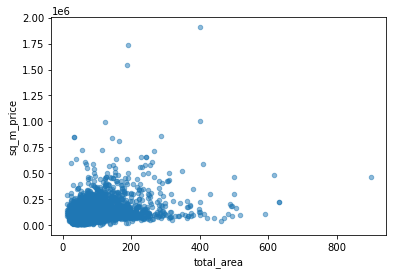

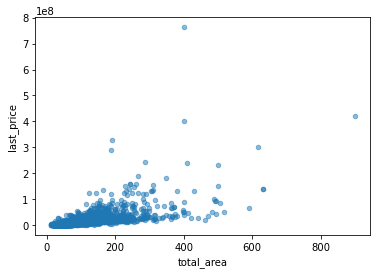

,total_area,sq_m_price,last_price
total_area,1.000000,0.301960,0.653675
sq_m_price,0.301960,1.000000,0.736499
last_price,0.653675,0.736499,1.000000


In [41]:
area_test_once= real_estate_clean.copy().sort_values('total_area')
area_test_once.plot(x='total_area', y='sq_m_price', kind='scatter', alpha=0.5)
plt.show()
area_test_once.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5)
plt.show()
area_test_once[['total_area', 'sq_m_price', 'last_price']].corr()

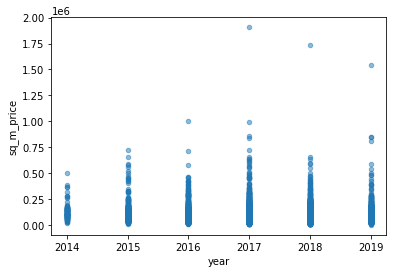

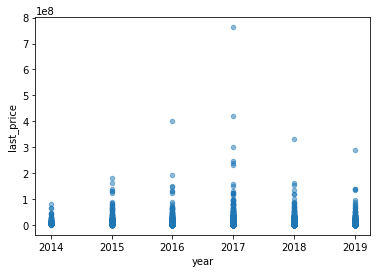

,year,sq_m_price,last_price
year,1.000000,0.008516,-0.043089
sq_m_price,0.008516,1.000000,0.736499
last_price,-0.043089,0.736499,1.000000


In [42]:
area_test_one= real_estate_clean.copy().sort_values('year')
area_test_two = area_test_one.query('cityCenters_nearest < 10000')
area_test_one.plot(x='year', y='sq_m_price', kind='scatter', alpha=0.5)
plt.show()
area_test_one.plot(x='year', y='last_price', kind='scatter', alpha=0.5)
plt.show()
area_test_one[['year', 'sq_m_price', 'last_price']].corr()

***Какие факторы больше всего влияют на стоимость квартиры?***


Рассмотренные факторы/столбцы:

    1. общая площадь : 'total_area'
        - Общая площадь не влияет ни на цену квадратного метра, ни на цену квартиры в целом.
        - Этот вывод могло бы быть другим для более узко определенной территории. Например, часто бывает, что более желаемые квартиры находятся в центре города где, как правило, есть меньше места. В нашей таблице, эти строки, где площадь маленькая а цена высокая, представлены вместе с объектами, где есть маленькая площадь и маленькая цена, которые наверно находятся далеко от центра. Однако, мне кажется, что для такого анализа, стоило бы и категоризировать цены квартиры и делать все рассчёты по этим категориям. 
        - Единственное заметное влияние это то, что у многих квартир с огромной площадью бОльшая конечная цена, но я бы не назвал это тенденцией, а просто логичный факт – это только правда для 'last_price', а не для 'sq_m_price'.
    2. количество комнат : 'rooms'
        - Количество комнат тоже не влияет на цену. Если посчитать по квадратному метру, то трёхкомнатнвые и четырёхкомнатые квартиры выделяются как самые дорогие. Однако, они во первых не настолько выделяются, а во вторых, тот факт, что они как правило более дорогие, чем студии или однокомнатные, не представляет тенденцией.
        - Как и для прошлого пункта, кажется что выборка у нас не правильная, чтобы прийти к каким-либо значительным выводам. Могу представлять такую возможность, что трёхкомнатные квартиры дороже других, но только с учётом расстояния от центра, или скорее, только если эти трёхкомнатные находятся в центре. Надо было бы проверять таким образом как написано в прошлом пункте.
    3. категория этажа : 'floor_cat'
        - Категория этажа влияет на цену квартиры: квартиры на первом этаже дешевле других.
        - Хотелось бы более точно сравнивать разницу между ценой квартир в категории 1 (не на первом, не на последном) и ценой квартир на последном этаже. График показывает, что цена квартир на последном этаже ниже, но эта разница не настолько выражена как для первого этажа. Наверно другая выборка или категоризация бы помогали делать более точные выводы.
    4. удалённость от центра : 'cityCenters_nearest'
        - Видно, что самые близкие к центру квартиры более дорогие, но такое замечание только действительно для квартир около центра; нету плавной тенденции по расстоянию от центра. Иными словами, квартиры в центре или около центра более дорогие, но удалённость от центра не влияет на цену достаточно сильно чтобы определять тенденцию по расстоянию. 
        - Не кажется, что тут анализ более узкой территории бы дал особо отличаюшиеся результаты – не кажется, что, когда речь идёт о местах в и около центра, цена меняется с расстоянием. Скорее кажется, что есть какая-то граница, за которой цены ниже.
    5. дата размещения :
        - день недели : 'day_of_week'
        - месяц : 'month'
        - год : 'year'
            - Из этих, только год размещения влияет на цену квартиры. Даже так, трудно приводить какие-либо точные выводы. В 2017 и 2018 было продано бОльшое количество квартир. В те же годы, цены были чуть по выше. Но, эта маленькая разница, во первых, а во вторых, эта разница могла бы быть результатом количество квартир на рынке, то есть результатом конкуренции. Поэтому, нельзя делать точные выводы с данными о дате размещения.
    6. для 10 населённых пунктов с наибольшим числом объявлений:
        - средняя цена квадратного метра
            - 79804
        - самая высокая средняя стоимость жилья
            - Санкт-Петербург: 
                - цена квартиры: 5623863
                - цена квадратного метра: 105714
        - самая низкая средняя стоимость жилья
            - Выборг:
                - цена квартиры: 3070241
                - цена квадратного метра: 58226

  

        
    

,count,mean,std,min,25%,50%,75%,max
km_from_center,,,,,,,,
0.0,4.0,110780.312125,23965.243133,90000.000000,97500.000000,104081.632653,117361.944778,144957.983193
1.0,80.0,119790.181770,33139.511145,74361.702128,99853.801170,111503.731343,131074.802473,292307.692308
2.0,134.0,116609.450623,28376.983801,66872.427984,95078.125000,115093.240093,131635.561634,221276.595745
3.0,184.0,109088.028969,22983.968392,63524.590164,92005.474453,104166.666667,123460.477941,194642.857143
4.0,387.0,116977.065860,31066.244234,17391.304348,94482.496195,111111.111111,135689.013880,262711.864407
5.0,498.0,122491.992994,31210.164622,26250.000000,99261.178753,120334.581773,142379.987374,237500.000000
6.0,383.0,123735.083874,29931.196657,37234.042553,101406.624383,118829.981718,144011.494253,231960.000000
7.0,273.0,116677.614009,24554.921477,59649.122807,100000.000000,113835.376532,133689.839572,192814.814815
8.0,449.0,115902.545434,25928.366577,41911.764706,97222.222222,113333.333333,131746.031746,221568.627451


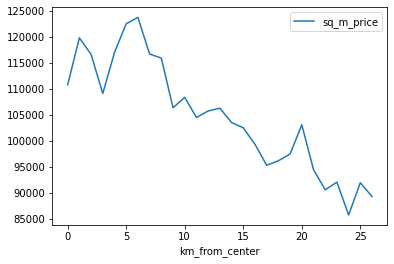

In [43]:
# Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге
#(locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах:
#округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, 
#как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
spb_real_estate = real_estate_clean[filter_conditions].query('locality_name == "санкт-петербург"')
spb_real_estate['km_from_center'] = (spb_real_estate['cityCenters_nearest']/1000).round()
spb_real_estate = spb_real_estate.dropna(subset=['km_from_center'])
spb_real_estate = spb_real_estate.sort_values('km_from_center', ascending=False)
spb_real_estate.pivot_table(index='km_from_center', values='sq_m_price', aggfunc='mean')\
        .plot(kind='line')
spb_real_estate.groupby(by='km_from_center')['sq_m_price'].describe()


После созданания столбца с расстоянием от центра в километрах, построил график с данными в этом столбце, а он показывает как раз не одно расстояние, полсе которого график сильно изменился, но два таких места.

        - Первое заметное изменение:
            - находится в 3 км – после этого график идёт резко вверх
            - наверно определяет, скажем, "самый центр"
                - это граница может существовать по разным причинам, но я бы предложил две гипотезы для начала:
                    1. Эта граница экономического характера
                        - Возможно, что в пределах этой территории есть больше возмоностей для работы, развлечений, или и то, и другое
                    2. Эта граница связана с общественным транспортом
                        - Хотя метро, например, конечно идёт гораздо дальше трёх метров, возможно, что люди считают такое расстояние приемлимым для поездки на работу и обратно с помощью общественного транспорта
        - Второе место заметного изменения в графике:
            - находится в 9 км – после этого значения менее сильно меняются с каждым километром
            - я бы предложил подобную гипотезу и для этого: возможно, что 9 км определяет расстояние, с которого удобно ездить на работу на машине
                
                
Мне кажется, что для точного анализа требуются адреса объектов. В графике здесь, информацию о местности 5 км на север и 5 км на юг не различать, информация смешана. Такой подход плохо соответствует реальности рынка недвижимости, поскольку на определённом расстоянии от центра могут находиться, например, очень богатый район на одной стороне города, а очень бедный на другой. Данные здесь не только не показывают такие тонкости, но это смешивание возможно различающейся информации даже мешает точному анализу.

array([[<AxesSubplot:xlabel='sq_m_price', ylabel='sq_m_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='sq_m_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='sq_m_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='sq_m_price'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='sq_m_price'>],
       [<AxesSubplot:xlabel='sq_m_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>],
       [<AxesSubplot:xlabel='sq_m_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='rooms'>],
       [<AxesSubplot:xlabel='sq_m_pric

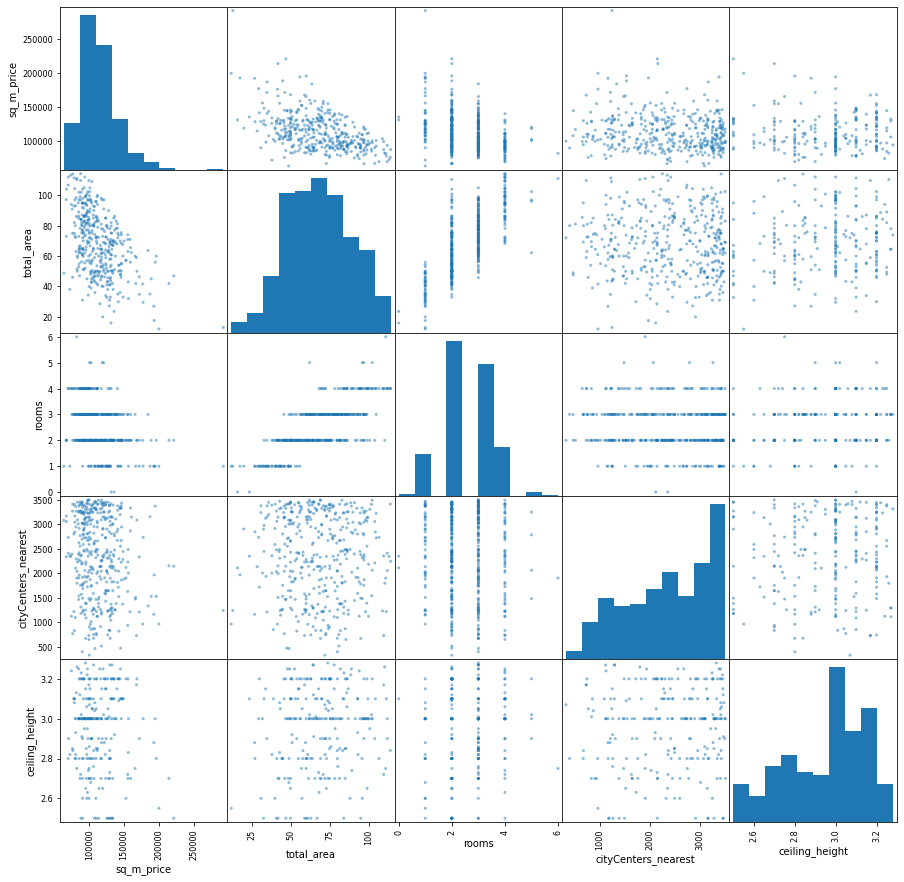

In [44]:
# Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, 
# высота потолков.

spb_center = spb_real_estate.query('km_from_center <= 3')
pd.plotting.scatter_matrix(spb_center[['sq_m_price', 'total_area', 'rooms', 'cityCenters_nearest', 'ceiling_height']], figsize=(15,15), alpha=0.5)



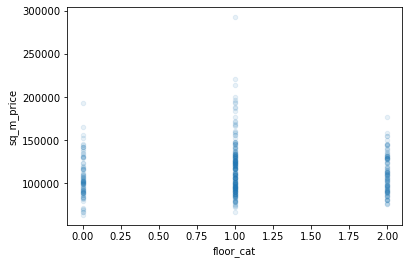

count_center            median_center                 count_all  \
            last_price sq_m_price    last_price     sq_m_price last_price   
floor_cat                                                                   
0                   85         85     6000000.0  102564.102564       2421   
1                  211        211     7700000.0  112307.692308      14452   
2                  106        106     8000000.0  109474.734043       2566   

                     median_all                
          sq_m_price last_price    sq_m_price  
floor_cat                                      
0               2421  3790000.0  80717.488789  
1              14452  4600000.0  97058.823529  
2               2566  3990000.0  85391.260163

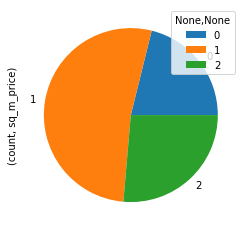

In [45]:
spb_center.plot(x='floor_cat', y='sq_m_price', kind='scatter', alpha=0.1)
plt.show()
display(spb_center.pivot_table(index='floor_cat', values=['sq_m_price', 'last_price'], aggfunc=['count', 'median'])\
       .merge((real_estate_clean[filter_conditions].pivot_table\
                   (index='floor_cat', values=['sq_m_price', 'last_price'], aggfunc=['count', 'median'])), on='floor_cat',\
                    suffixes=('_center', '_all')))
spb_center.pivot_table(index='floor_cat', values='sq_m_price', aggfunc=['count', 'median'])\
    .plot(y=('count', 'sq_m_price'), kind='pie')
plt.show()

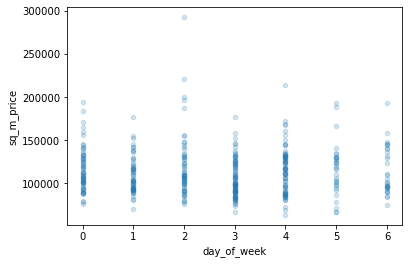

,count_center,median_center,count_all,median_all
,sq_m_price,sq_m_price,sq_m_price,sq_m_price
day_of_week,,,,
0,64,111851.063830,2955,93421.052632
1,57,103669.724771,3463,94339.622642
2,61,110027.855153,3237,94378.698225
3,84,100000.000000,3477,93767.236624
4,75,116252.821670,3296,93750.000000
5,31,117391.304348,1600,92509.842520
6,30,103673.245614,1411,93891.402715


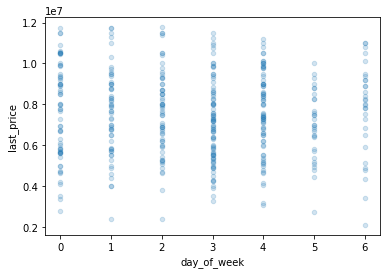

,count_center,median_center,count_all,median_all
,last_price,last_price,last_price,last_price
day_of_week,,,,
0,64,7865000.0,2955,4450000.0
1,57,7700000.0,3463,4490000.0
2,61,7700000.0,3237,4450000.0
3,84,7095000.0,3477,4400000.0
4,75,7550000.0,3296,4364375.0
5,31,6999000.0,1600,4400000.0
6,30,8100000.0,1411,4400000.0


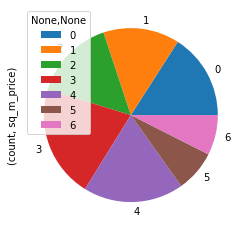

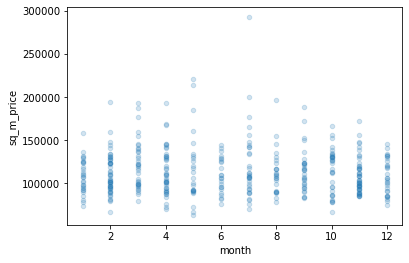

,count_center,median_center,count_all,median_all
,sq_m_price,sq_m_price,sq_m_price,sq_m_price
month,,,,
1,29,107627.118644,1196,94146.312300
2,50,105565.872842,2163,94249.578415
3,35,120289.855072,2128,94323.226884
4,42,109853.862213,1972,95698.427382
5,25,105846.153846,1037,92045.454545
6,23,106172.839506,1427,91891.891892
7,33,108404.384896,1385,93256.814921
8,25,110027.855153,1463,94786.729858


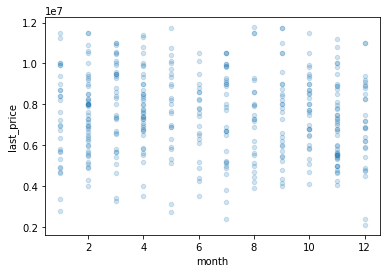

,count_center,median_center,count_all,median_all
,last_price,last_price,last_price,last_price
month,,,,
1,29,7250000.0,1196,4400000.0
2,50,7550000.0,2163,4400000.0
3,35,8400000.0,2128,4450000.0
4,42,7650000.0,1972,4585000.0
5,25,8000000.0,1037,4400000.0
6,23,7550000.0,1427,4200000.0
7,33,7850000.0,1385,4350000.0
8,25,7297000.0,1463,4400000.0


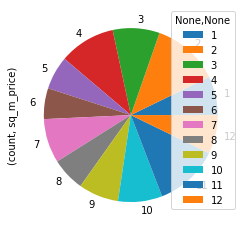

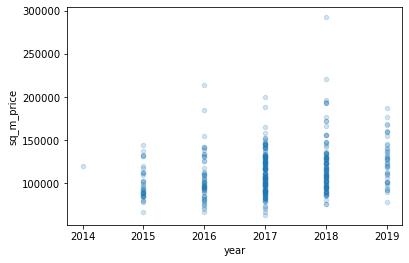

,count_center,median_center,count_all,median_all
,sq_m_price,sq_m_price,sq_m_price,sq_m_price
year,,,,
2014,1,120578.778135,77,97000.000000
2015,37,93548.387097,887,91111.111111
2016,57,99361.896080,2238,90477.389913
2017,157,108055.555556,6711,91666.666667
2018,108,113666.666667,7140,94925.981549
2019,42,125183.184072,2386,102387.284701


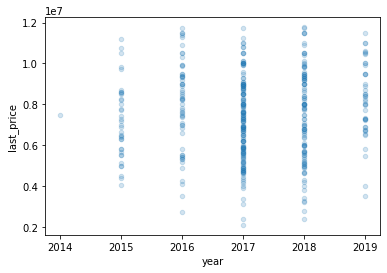

,count_center,median_center,count_all,median_all
,last_price,last_price,last_price,last_price
year,,,,
2014,1,7500000.0,77,5650000.0
2015,37,7000000.0,887,4890000.0
2016,57,8280000.0,2238,4300000.0
2017,157,7200000.0,6711,4300000.0
2018,108,7600000.0,7140,4395000.0
2019,42,8200000.0,2386,4800000.0


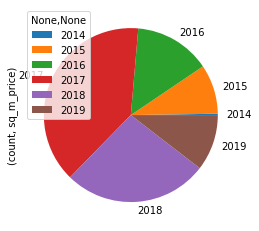

In [46]:
# Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, 
# дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
time_list = ['day_of_week', 'month', 'year']
for time in time_list:
    spb_center.plot(x=time, y='sq_m_price', kind='scatter', alpha=0.2)
    plt.show()
    display(spb_center.pivot_table(index=time, values='sq_m_price', aggfunc=['count', 'median'])\
           .merge((real_estate_clean[filter_conditions].pivot_table\
                   (index=time, values='sq_m_price', aggfunc=['count', 'median'])), on=time,\
                    suffixes=('_center', '_all')))
    spb_center.plot(x=time, y='last_price', kind='scatter', alpha=0.2)
    plt.show()
    display(spb_center.pivot_table(index=time, values='last_price', aggfunc=['count', 'median'])\
            .merge((real_estate_clean[filter_conditions].pivot_table\
                    (index=time, values='last_price', aggfunc=['count', 'median'])), on=time,\
                     suffixes=('_center','_all')))
    spb_center.pivot_table(index=time, values='sq_m_price', aggfunc=['count', 'median'])\
        .plot(y=('count', 'sq_m_price'), kind='pie')
    plt.show()


**Отличаются ли выводы о недвижимости в центре от общих выводов по всему городу?**

Единственное замечание, который я бы делал с достаточной уверенностью, о различиях между данными о центре и всеми данными, это то, что конечная цена и цена по квадратному метру выше в центре.

Это конечно логично, но стоит сказать, что информация про центр видна и является частью графиков со всеми данными. Тенденции одни и те же, отличается только цена квартир.

То есть, площадь, цена, число комнат, высота потолков, этаж, удалённость от центра, дата размещения объявления, всё это не влияет на цену по другому для центра чем для остальных данных.

## Общий вывод

Факторы, которые больше всего влияют на цену квартиры:

    - расстояние от центра
        - Чем дальше от центра, тем дешевле квартира.
        - Квартиры, которые в центре, стоят больше
            - Тенденция сильнее выражена для квартир в центре – цена больше меняется с каждым километром
        - Есть связь между ценой и расстоянием от центра и для квартир вне центра – чем дальше от центра, тем дешевле квартира
            - Тенденция менее сильно выражена для квартир вне центра – цена меньше меняется с каждым километром
        - Кажется, что опеределение изменений в цене по географическим причинам требует другой подход и другие данные. Одно расстояние от центра не отражает влияние опрелённого района/посёлка/тому подобного на цену. Бывает то, что очень дорогой район и очень бедный район находятся на одном расстоянии от центра, но у них цены недвижимости наверняка сильно отличаются друг от друга. Для более точного анализа, нужны данные об адресах или хоть бы о районах объектов.
    - этаж
        - Квартиры на первом этаже как правило меньше стоят.
        - Квартиры на последном этаже тоже меньше стоят, но тут не хватает важных данных:
            - наличие лифта
            - количество этажей
                - эти данные есть для некоторых строк, но во-первых, нужны данные для бОльшей части для хорошего анализа, а во-вторых, эти данные значительно существеннее если знаем о наиличии лифта. Без такой информации, они мало добавляют к пониманию датасета.
    - год
        - Цены возрастают с каждым годом, но возможно, что это связано с инфляцией – нельзя сказать точно, что эта тенденция именно для рынка недвижимости. Однако, тоже возможно, что цены возрастают из-за того, что город развивается.
        - Можно было бы расследовать такой вопрос, например, пользуясь или индексом инфляции, или данными из разных городов, чтобы сравнивать рост цен по отношению и к другим городам, и к инфляции.
    - площадь
        - Этот фактор точно влияет на конечную цену квартир, но не влияет на цену по квадратному метру.
        - Это можно объяснить тем, что у многих дорогих квартир в центре как раз маленькая площадь, и наоборот вне города могут быть дешёвые квартиры большой площади. Поэтому, как и для зависимости цены от расстояния от центра, нужно было бы более вниматенльно посматривать местонахождение квартир, например с данными об адресах или о районах квартир.
        
        
По моему мнению, это исследование доказало, что действительно есть связь между некоторыми факторами и ценой недвижимости. Однако, мне нехватает точности результатов. Если бы я получил такой отчёт от сотрудника, я бы пришёл к выводу, что направление этого исследования точное, а что стоит дальше работать над ним.